<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Regresión Logística </p> Árboles de Decisión </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>




# <FONT SIZE=5 COLOR="blue"> 1. Idea Intuitiva de Regresión Logística </FONT>

- Usamos regresión logística para estudiar la probabilidad de una variable categórica cualitativa (por ejemplo, dicotómica)  en función de una o más variables cuantitativas.

- En otras palabras, la regresión logística no permite clasificar directamente, pero si permite determinar una probabilidad de pertenecer a un grupo determinado de la variable categórica. Y luego, de acuerdo con esa probabilidad, tomar una decisión de asignación.

Se puede emplear la regresión logística por ejemplo:

- La probabilidad de estar empleado en función de carrera, nivel de inglés, edad.

- La probabilidad de que alguien compre un producto en función del ingreso, estrato, género.

- La probabilidad de pagar una deuda en funcion de otras deudas, ingreso, estado civil.

### Motivación al modelo

Supongamos que tenemos una variable categórica con dos clases, que las llamaremos $\{0, 1\}$. Entonces, si tratamos de buscar un modelo lineal de la forma

$$y = \beta_0 +\beta_1 x_1 +\epsilon$$

donde $y$ es una variable binaria, no sería un buen modelo ya que la parte izquierda de la expresión es continua. Luego, podríamos pensar en no tener una relación directa, sino vía la probabilidad, así:

$$P(y_i=1 \mid X = x_i)= \beta_0+\beta_1x_i$$

Cuando intentamos usar mínimos cuadrados, es fácil ver que el modelo no funciona ya que predecimos valores mayores que 1 y menores que 0.

<center><img src="https://github.com/Fabian830348/cursos/blob/0da91b828112d77dbddb387cbb7043ab8a78f252/Imagen/log1.png?raw=true" alt="centered image" width="500" height="400"></center>

podemos observar que este modelo no se ajusta a los datos. Más aún. Si tratamos de predecir un valor, como $x=1.1$, al tratarse de una probabilidad, este valor no tiene sentido, pues es negativo.

Entonces, buscaremos una función cumpla lo siguiente

- $P(y_i=1 \mid X = x_i) = f(\beta_0 + \beta_1 x_i)$

- $P(y_i=1 \mid  x_i)$ sea creciente en $x$ para $\beta_1>0$.

- $P(y_i=1 \mid  x_i)$ sea decreciente en $x$ para $\beta_1<0$.

- $0 \leq P(y_i=1 \mid  x_i) \leq 1$ para todo valor de $x_i$.

Se puede ver rápidamente que la función debería tener una forma de S. A esta función se le denomina función sigmoide y es la base del modelo logístico

$$f(x)= \dfrac{e^x}{1+e^x}$$

La gráfica de esta función es:

<center><img src="https://github.com/Fabian830348/cursos/blob/0da91b828112d77dbddb387cbb7043ab8a78f252/Imagen/log2.png?raw=true" alt="centered image" width="500" height="400"></center>

Así pues, tenemos una expresión de la forma

$$P(y_i=1 \mid  X = x_i)= \dfrac{e^{\beta_0+\beta_1x_i}}{1+e^{\beta_0+\beta_1x_i}}$$


# <FONT SIZE=5 COLOR="blue"> 2. Idea Intuitiva de Árboles de Decisión </FONT>

Vamos a trabajar los *árboles de decisión* para problemas de clasificación.

- El enfoque de clasificación y regresión vía árboles (CART, classification and regression tree) fue desarrollado por Breiman et al. (1984).

- Un árbol de decisión es una estructura que incluye un ***nodo raíz, nodos principales, ramas y nodos hoja***. Cada nodo interno denota una prueba sobre un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol también es llamado: **nodo raíz**.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree1.png?raw=true" alt="centered image" width="500" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Los términos que intervienen en el algoritmo de árbol de decisión son los siguientes

- ***Nodo raíz:***: Es el nodo inicial del árbol.

- ***División:*** Es un proceso de división de un nodo en dos o más subnodos.

- ***Nodo de decisión***: Cuando un subnodo se divide en otros subnodos, se denomina nodo de decisión.

- ***Nodo hoja/terminal***: Son los nodos que no se dividen más.

- ***Rama/Subárbol***:  Una subsección de un árbol completo que inicia con un nodo principal.

- ***Profundidad:*** Es el número de niveles de decisión en el árbol.

- ***Poda***: Es el proceso de eliminar nodos de decisión con el fin de hacer el árbol más pequeño

Esta técnica de machine learning toma una serie de decisiones binarias en forma de árbol. Los nodos intermedios (las ramas) representan soluciones y los nodos finales (las hojas) nos dan la predicción que buscamos.

Para seleccionar las condiciones que conforman el árbol se usan dos elementos que se describirán más adelante.

  - Indice de Gini
  - Ganancia de Información (Entropía)

## <FONT SIZE=5 COLOR="purple"> 2.1 Esquema general </FONT>

En esta sección revisaremos algunas generalidades del funcionamiento del algoritmo *CART*. Para esto supondremos la existencia de solo dos características para que podamos graficar en el plano.

Lo primero que debemos indicar es que el algoritmo se basa en una serie de decisiones binarias, que gráficamente, no es más que una división de una región del plano donde están los datos.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree2.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Esta división se hace con el fin de separar un conjunto de puntos en las clases correspondientes. Consideremos el siguiente conjunto de puntos:

$$\{(x_i,y_i) \mid i = 1,2,3, \dots 29\}$$

<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree13.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Buscamos hacer divisiones rectangulares con el fin de separar los puntos. Para esto debemos iniciar con una condición, pero ¿cómo se hace esto?

Para responder está pregunta debemos hacer una grilla o cuadrícula tomando como referencia puntos entre cada $(x_i,x_{i+1}$) y $(y_i,y_{i+1})$.Por lo general se toma el punto medio

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree3.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Ahora, debemos determinar cuál condición $x \leq x_i$ o $y \leq y_j$ es más apropiada para iniciar. Esta condición nos dará el nodo raíz que es el inicio del algoritmo.

Es en este punto donde debemos tener un criterio de decisión. Para ello hay dos alternativas: usar el índice de Gini o la Entropía, con el fin de determinar la mejor condición.

## <FONT SIZE=5 COLOR="magenta"> 2.1.1 Indice de Gini </FONT>

- El índice de Gini dice que, si seleccionamos al azar dos elementos de una población, deben ser de la misma clase y la probabilidad de que esto ocurra es 1 si la población es pura. En otras palabras, este índice permite determinar si un conjunto de puntos es homogéneo o no.

- Este índice funciona con la variable objetivo categórica "Éxito" o "Fracaso". Sólo realiza divisiones binarias.

*Cuanto menor sea el valor de Gini, mayor será la homogeneidad.*

- El **índice de Gini** está dado en general como:

$$Gini = 1-\sum \limits_{k=1}^{n}p_k^2$$

donde $p_k$ es la probabilidad de seleccionar un objeto de la clase $k$ en un determinado nodo.

Veamos un ejemplo de dos condiciones:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree14.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Ahora bien, para determinar si elegimos una condición o no, usaremos el concepto de *impureza*, que se define de la siguiente manera

$$\text{Impureza de un nodo} = (Gini) \times (\text{Ponderacion de los nodos})$$

Supongamos que en nuestro ejemplo ( de los puntos dados arriba) queremos saber cuál condición es mejor, es decir, tiene un nivel de impureza menor.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree5.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Es importante resaltar que el algoritmo compara todas las impurezas y escoje la menor. En ese sentido, la función de costo para los árboles de clasificación es:

$$\text{función de costo} = 1-\sum \limits_{k=1}^{n}p_k^2$$

Partiendo de esta condición, comenzamos la división en el árbol buscando minimizar esta función.

En las siguientes imágenes se observan las divisiones del árbol para diferentes valores

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree4.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree6.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree7.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

**Observación:** El método de árboles de decisión busca minimizar el índice de Gini y esto se puede lograr dividiendo el árbol de manera exhaustiva. Es decir, practicamente que cada punto este en una región. Pero esto es malo, ya que estamos *sobreajustando* el modelo. En otras palabras, el modelo clasifica perfectamente los datos del conjunto de entrenamiento pero no clasificará bien en los datos de prueba.

## <FONT SIZE=5 COLOR="purple"> 2.3 Clasificación de un nuevo registro </FONT>

Para clasificar un nuevo registro vamos recorriendo el árbol dependiendo de las condiciones que se hayan generado y cuando lleguemos al último nodo hoja correspondiente, determinamos la clasificación usando la clase mayoritaria.

Veamos un ejemplo

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree8.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

# <FONT SIZE=5 COLOR="blue"> 3. Idea Intuitiva de Random Forest </FONT>

- Random Forest es un algoritmo de aprendizaje supervisado.

- Tiene dos variaciones: una se usa para problemas de clasificación y la otra se usa para problemas de regresión.

- Es uno de los algoritmos más flexibles y fáciles de usar.

- Crea árboles de decisión en las muestras de datos dadas, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación. También es un buen indicador de la importancia de las características.

- El algoritmo de bosque aleatorio combina múltiples árboles de decisión, lo que da como resultado un bosque de árboles, de ahí el nombre de bosque aleatorio.

- En el clasificador de bosque aleatorio, cuanto mayor sea el número de árboles en el bosque, mayor será la precisión.

La idea del algoritmo de bosque aleatorio se puede dividir en dos etapas.

En la primera etapa, seleccionamos aleatoriamente $k$ características de un total de $m$ características y construimos el bosque aleatorio. En la primera etapa, procedemos de la siguiente manera:

- Seleccionar aleatoriamente $k$ características de un total de $m$ características donde $k < m $.

- Entre las características $k$, calcular el nodo $d$ utilizando el mejor punto de división.

- Dividir el nodo en nodos secundarios usando la mejor división.

- Repetir los pasos 1 a 3 hasta alcanzar el número de nodos.

- Construir un bosque repitiendo los pasos 1 a 4,  $n$ veces para crear $n$ árboles.

- En la segunda etapa, hacemos predicciones utilizando el algoritmo de bosque aleatorio entrenado.

- Tomamos las funciones de prueba y usamos las reglas de cada árbol de decisión creado aleatoriamente para predecir el resultado y almacenar el resultado previsto.

- Luego, calculamos los votos para cada objetivo previsto.

- Finalmente, consideramos el objetivo pronosticado más votado como la predicción final del algoritmo de bosque aleatorio.

<center><img src="https://github.com/Fabian830348/cursos/blob/master/rforest1.png?raw=true" alt="centered image" width="500" height="350"></center>

# <FONT SIZE=5 COLOR="purple"> 4. Ejemplo Práctico con Datos: diabetes</FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 4.1 Librerías de trabajo </FONT>

In [ ]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar modelos
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier

# Para graficar los árbolitos
from sklearn.tree               import export_graphviz
from graphviz                   import Source

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.metrics           import specificity_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 4.2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada una de las pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 4.3 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"
diabetes= pd.read_csv(url)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# cambiar el nombre de Outcome por resultado
diabetes.rename(columns={"Outcome":"resultado"}, inplace=True)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <FONT SIZE=4 COLOR="blue">  4.4 Alistamiento para el modelo</FONT>

En este paso vamos a definir

- Variable objetivo

- Variables predictoras

- Conjunto de entrenamiento y de prueba

- Escalr los datos

In [ ]:
# las variables predictoras
X = diabetes.drop("resultado", axis=1)
# la variable objetivo
y = diabetes["resultado"]
# Dividir en dos conjuntos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify = y,             # garantizar proporción en 1 y 0 en entrenamiento y prueba.
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

## <FONT SIZE=4 COLOR="blue">  4.5 Modelo KNN</FONT>

Vamos a aplicar el modelo KNN.

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*.

Para generar el modelo tenemos múltiples alternativas, ya que podemos seleccionar:

   - **k** : número de vecinos. Por defecto $k=5$
   - La **métrica** : *minkowski* , *manhattan* , *euclidean*, etc.
   - Los pesos **weights**: *uniform* y *distance*. Por defecto *uniform*

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# definir el modelo
KNN = KNeighborsClassifier(n_neighbors = 10,         # número de vecinos k=10
                           metric = 'euclidean',     # métrica euclideana
                           weights= "uniform")       # peso que se asigna a los datos
# entrenamos el modelo
KNN.fit(X_train_s,y_train)

# Evaluar el modelo
y_pred_knn = KNN.predict(X_test_s)

metrics=["accuracy","recall","Specificity","precision","f1"]
# valores
values = [accuracy_score(y_test,y_pred_knn),
          recall_score(y_test,y_pred_knn),
          specificity_score(y_test,y_pred_knn),
          precision_score(y_test,y_pred_knn),
          f1_score(y_test,y_pred_knn)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.727273
1,recall,0.469136
2,Specificity,0.866667
3,precision,0.655172
4,f1,0.546763


## <FONT SIZE=4 COLOR="blue">  4.6 Modelo Regresión Logística</FONT>



In [ ]:
# definir el modelo
Log_reg = LogisticRegression(random_state=0)
# entrenamos el modelo
Log_reg.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_log = Log_reg.predict(X_test_s)
metrics=["accuracy", "recall", "Specificity", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_log),
          recall_score(y_test,y_pred_log),
          specificity_score(y_test,y_pred_log),
          precision_score(y_test,y_pred_log),
          f1_score(y_test,y_pred_log)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.774892
1,recall,0.555556
2,Specificity,0.893333
3,precision,0.737705
4,f1,0.633803


## <FONT SIZE=4 COLOR="blue">  4.7 Modelo Árboles de Decisión</FONT>



In [ ]:
# Generamos el modelo
Decision_Tree = DecisionTreeClassifier(max_depth = 6,           # Profundidad del árbol
                                       criterion = "gini",      # Función de costo.
                                       random_state = 123)      # Semilla
# entrenamos el modelo
Decision_Tree.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_tree = Decision_Tree.predict(X_test_s)
metrics=["accuracy", "recall","Specificity","precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_tree),
          recall_score(y_test,y_pred_tree),
          specificity_score(y_test,y_pred_tree),
          precision_score(y_test,y_pred_tree),
          f1_score(y_test,y_pred_tree)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.748918
1,recall,0.604938
2,Specificity,0.826667
3,precision,0.653333
4,f1,0.628205


In [ ]:
dot_data = export_graphviz(Decision_Tree,                                 # modelo
                           feature_names = X_train.columns,            # columnas de entrenamiento
                           filled=True)                                # colores del árbol (relleno)
Source(dot_data, format="png")

## <FONT SIZE=4 COLOR="blue">  4.8 Modelo Random Forest</FONT>

In [ ]:
# Generamos el modelo
random = RandomForestClassifier()
# entrenamos el modelo
random.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_random = random.predict(X_test_s)
metrics=["accuracy", "recall","Specificity","precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_random),
          recall_score(y_test,y_pred_random),
          specificity_score(y_test,y_pred_random),
          precision_score(y_test,y_pred_random),
          f1_score(y_test,y_pred_random)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.792208
1,recall,0.629630
2,Specificity,0.880000
3,precision,0.739130
4,f1,0.680000


Ahora vamos a calcular al área bajo la curva y las curvas ROC

# <FONT SIZE=5 COLOR="blue"> 5. Curva ROC (Receiver operating characteristic) </FONT>

- *ROC* es el acrónimo de Receiver Operating Characteristics (característica operativa del receptor) y fue desarrollada en el campo de la ingeniería electrónica para medir la detección de objetos enemigos en el campo de batalla usando los radades durante la segunda guerra mundial. Fue la base para la TDS-Teoría de Detección de Señales.

- Sus aplicaciones trascendieron más allá del campo militar en áreas como la medicina, la epidemiología y en la investigación, etc.

- Ahora, la curva ROC se aplica para evaluar algoritmos de *machine learning* y hacer comparación del rendimiento de estos.

- Formalmente, la ***curva ROC*** es la representación gráfica de la razón o proporción de verdaderos positivos (TPR = True positive rate) frente a la razón o proporción de falsos positivos (FPR = False positive rate) según se varía el umbral de discriminación (valor a partir del cual decidimos que un caso es un positivo).

- La curva *ROC* nos dice qué tan bueno puede distinguir el modelo entre dos cosas, por ejemplo, si un paciente tiene cáncer o no. Mejores modelos pueden distinguir con precisión entre los dos, mientras que un modelo pobre tendrá dificultades para distinguir entre los dos.

Supongamos que tenemos un modelo que predice si un paciente tiene cáncer o no. Teniendo en cuenta la matriz de confusión:

<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="500" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>
Podemos representar estos elementos en el plano cartesiano de la siguiente manera.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/ROC/roc1.png?raw=true" alt="centered image" width="500" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

- Línea azul: pacientes sanos. (sin cáncer).
- Línea Naranja: pacientes enfermos. (con cáncer).
- Para la clasificación tomamos por defecto un *umbral* de $\alpha=0.5$.
- Por encima de $\alpha=0.5$ clasificamos al paciente: *con cáncer*.
- Por debajo de $\alpha=0.5$ clasificamos al paciente: *sin cáncer*.

Ahora bien, de acuerdo con la matriz de confusión:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/ROC/roc2.png?raw=true" alt="centered image" width="500" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

- Los valores positivos por encima del umbral serán *verdaderos positivos*
- Los valores negativos por encima del umbral serán *falsos positivos*; ya que se predicen incorrectamente como positivos.
- Los valores negativos por debajo del umbral serán *verdaderos negativos*.
- Los valores positivos por debajo del umbral serán *falsos negativos*, ya que se pronostican incorrectamente como negativos.

Recordemos dos fórmulas de la matriz de confusión:  *sensibilidad* y *especificidad*.

La ***sensibilidad o recall***, es la proporción de pacientes que se identificaron correctamente por tener cáncer, es decir verdadero positivo, sobre el número total de pacientes que realmente tienen la enfermedad.

$$recall = \dfrac{VP}{VP+FN}$$

Por su parte, ***especificidad*** es la proporción de pacientes que se identificaron correctamente por no tener cáncer, verdadero negativo, sobre el número total de pacientes que no tienen la enfermedad.

$$specificity = \dfrac{VN}{VN+FP}$$

Si movemos el umbral, los valores de $VN, VP, FN, FP$ cambiarán y tendríamos clasificaciones diferentes:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/ROC/roc3.png?raw=true" alt="centered image" width="550" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

**Relación entre *recall* y *specificity* **

- Entre mayor sea el *recall* (sensibilidad) menor será la especificidad, en otras palabras, guardan una relación inversa.

- La curva ROC es la gráfica de $recall$ contra

$$1- especificidad = \dfrac{FP}{VN+FP}$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/4dc5beacae26450da3a6193ef145a9b90a5f5aba/ROC/roc4.PNG?raw=true" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

Veamos algunos casos:

- Si el umbral separa totalmente los dos conjuntos la clasificación es perfecta.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/4dc5beacae26450da3a6193ef145a9b90a5f5aba/ROC/roc5.PNG?raw=true" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

- Si se da la siguiente situación, el modelo es malo ya que no discrimina entre positivos y negativos.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/4dc5beacae26450da3a6193ef145a9b90a5f5aba/ROC/roc6.PNG?raw=true" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

Ver el siguiente vídeo

[Simulación de ROC](https://www.youtube.com/watch?v=fsgDD0pNkZ0&t=322s)

In [ ]:
Log_reg.predict_proba(X_train_s)

array([[0.58129129, 0.41870871],
       [0.28123608, 0.71876392],
       [0.65279463, 0.34720537],
       ...,
       [0.95993387, 0.04006613],
       [0.92822835, 0.07177165],
       [0.52422936, 0.47577064]])

In [ ]:
# para knn
# calculamos el área bajo la curva ROC: AUC
knn_roc_auc = roc_auc_score(y_train, KNN.predict_proba(X_train_s)[:,1])
knn_roc_auc

np.float64(0.8399006875477464)

In [ ]:
# para regresión logística
# calculamos el área bajo la curva ROC: AUC
log_roc_auc = roc_auc_score(y_train, Log_reg.predict_proba(X_train_s)[:,1])
log_roc_auc

np.float64(0.8232849503437739)

In [ ]:
# para árboles de decisión
# calculamos el área bajo la curva ROC: AUC
tree_roc_auc = roc_auc_score(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])
tree_roc_auc

np.float64(0.9344003055767762)

In [ ]:
roc_curve(y_train, KNN.predict_proba(X_train_s)[:,1])

(array([0.        , 0.00285714, 0.00857143, 0.04857143, 0.10285714,
        0.18      , 0.23714286, 0.38571429, 0.52571429, 0.74285714,
        1.        ]),
 array([0.        , 0.06417112, 0.14438503, 0.32620321, 0.52941176,
        0.65240642, 0.77540107, 0.86631016, 0.96256684, 1.        ,
        1.        ]),
 array([inf, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

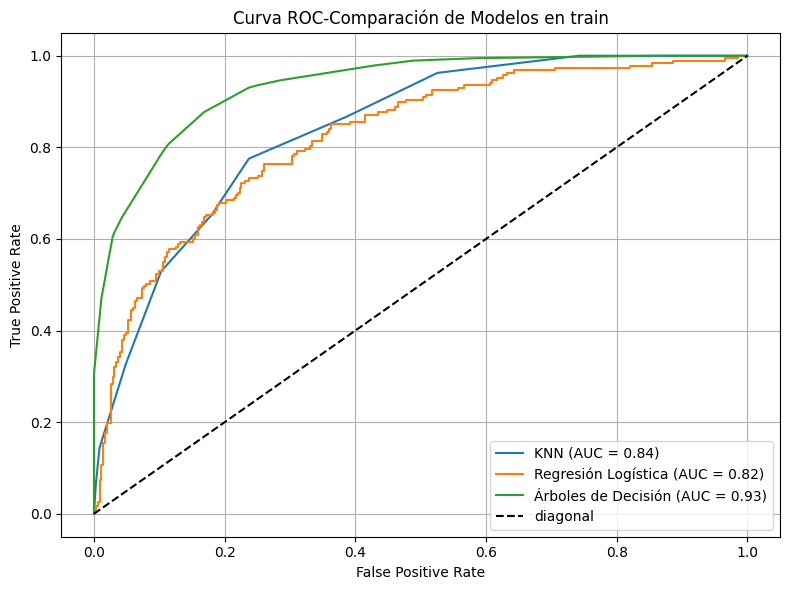

In [35]:
# graficar las curvas ROC
fpr1, tpr1, thresholds1 = roc_curve(y_train, KNN.predict_proba(X_train_s)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_train, Log_reg.predict_proba(X_train_s)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])

auc1 = roc_auc_score(y_train, KNN.predict_proba(X_train_s)[:,1])
auc2 = roc_auc_score(y_train, Log_reg.predict_proba(X_train_s)[:,1])
auc3 = roc_auc_score(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'KNN (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Regresión Logística (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Árboles de Decisión (AUC = {auc3:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label='diagonal')

# Estética
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC-Comparación de Modelos en train')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

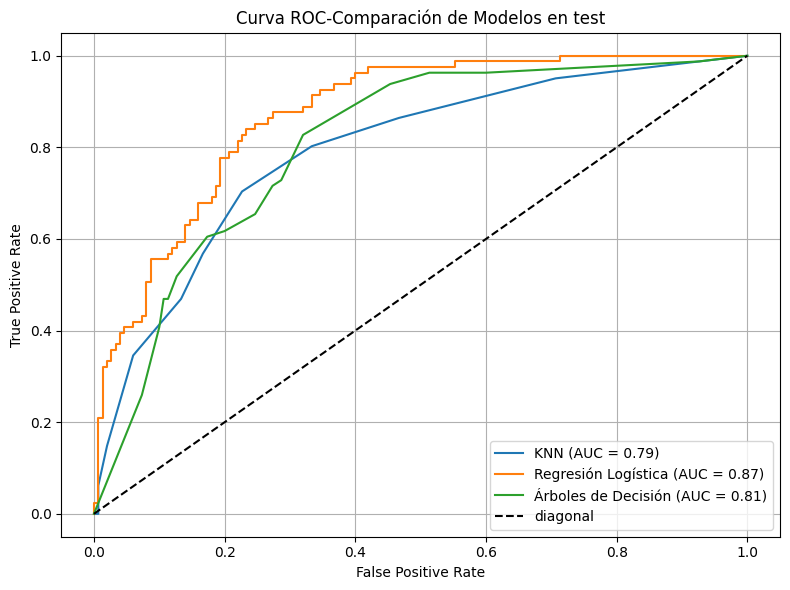

In [36]:
# graficar las curvas ROC
fpr1, tpr1, thresholds1 = roc_curve(y_test, KNN.predict_proba(X_test_s)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, Log_reg.predict_proba(X_test_s)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, Decision_Tree.predict_proba(X_test_s)[:,1])

auc1 = roc_auc_score(y_test, KNN.predict_proba(X_test_s)[:,1])
auc2 = roc_auc_score(y_test, Log_reg.predict_proba(X_test_s)[:,1])
auc3 = roc_auc_score(y_test, Decision_Tree.predict_proba(X_test_s)[:,1])

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'KNN (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Regresión Logística (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Árboles de Decisión (AUC = {auc3:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label='diagonal')

# Estética
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC-Comparación de Modelos en test')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()